In [1]:
from glob import glob
import os, re

import matplotlib.pyplot as plt
import numpy as np
import ROOT as rt
import root_numpy as rtnp
from histo_utilities import create_TH1D

from cebefo_style import cebefo_style
cebefo_style()

Welcome to JupyROOT 6.10/08


In [2]:
hlf_features = ['HT', 'METp', 'METo', 'MT', 'nJets', 
                'bJets', 'allJetMass', 'LepPt', 'LepEta', 
                'LepIsoCh', 'LepIsoGamma', 'LepIsoNeu', 'LepCharge', 
                'LepIsEle', 'nMu', 'allMuMass', 'allMuPt', 'nEle', 
                'allEleMass', 'allElePt', 'nChHad', 'nNeuHad', 'nPhoton']

In [6]:
folder = '../data/HLF_ONLY/'
datasets = glob(folder+'*.npy')

dataset_path = {}
for path in datasets:
    n = os.path.basename(path)
    aux = re.search(r'[a-zA-Z0-9]+_', n)
    name = aux.group(0)[:-1]
    print name, ' ---> ', path
    dataset_path[name] = path

Ato4l  --->  ../data/HLF_ONLY/Ato4l_lepFilter_13TeV_sample.npy
leptoquark  --->  ../data/HLF_ONLY/leptoquark_LOWMASS_lepFilter_13TeV_sample.npy
qcd  --->  ../data/HLF_ONLY/qcd_lepFilter_13TeV_sample.npy
ttbar  --->  ../data/HLF_ONLY/ttbar_lepFilter_13TeV_sample.npy
Wlnu  --->  ../data/HLF_ONLY/Wlnu_lepFilter_13TeV_sample.npy
Wprime  --->  ../data/HLF_ONLY/Wprime_lepFilter_13TeV_sample.npy
Zprime  --->  ../data/HLF_ONLY/Zprime_lepFilter_13TeV_sample.npy


In [7]:
DS = 'ttbar'

_ttbar_HT
_ttbar_METp
_ttbar_METo
_ttbar_MT
_ttbar_nJets
_ttbar_bJets
_ttbar_allJetMass
_ttbar_LepPt
_ttbar_LepEta
_ttbar_LepIsoCh
_ttbar_LepIsoGamma
_ttbar_LepIsoNeu
_ttbar_LepCharge
_ttbar_LepIsEle
_ttbar_nMu
_ttbar_allMuMass
_ttbar_allMuPt
_ttbar_nEle
_ttbar_allEleMass
_ttbar_allElePt
_ttbar_nChHad
_ttbar_nNeuHad
_ttbar_nPhoton


Info in <TCanvas::Print>: png file ../fig/DatasetCheck/HT_ttbar.png has been created
Info in <TCanvas::Print>: png file ../../www/DatasetCheck/HT_ttbar.png has been created
Info in <TCanvas::Print>: png file ../fig/DatasetCheck/METp_ttbar.png has been created
Info in <TCanvas::Print>: png file ../../www/DatasetCheck/METp_ttbar.png has been created
Info in <TCanvas::Print>: png file ../fig/DatasetCheck/METo_ttbar.png has been created
Info in <TCanvas::Print>: png file ../../www/DatasetCheck/METo_ttbar.png has been created
Info in <TCanvas::Print>: png file ../fig/DatasetCheck/MT_ttbar.png has been created
Info in <TCanvas::Print>: png file ../../www/DatasetCheck/MT_ttbar.png has been created
Info in <TCanvas::Print>: png file ../fig/DatasetCheck/nJets_ttbar.png has been created
Info in <TCanvas::Print>: png file ../../www/DatasetCheck/nJets_ttbar.png has been created
Info in <TCanvas::Print>: png file ../fig/DatasetCheck/bJets_ttbar.png has been created
Info in <TCanvas::Print>: png fil

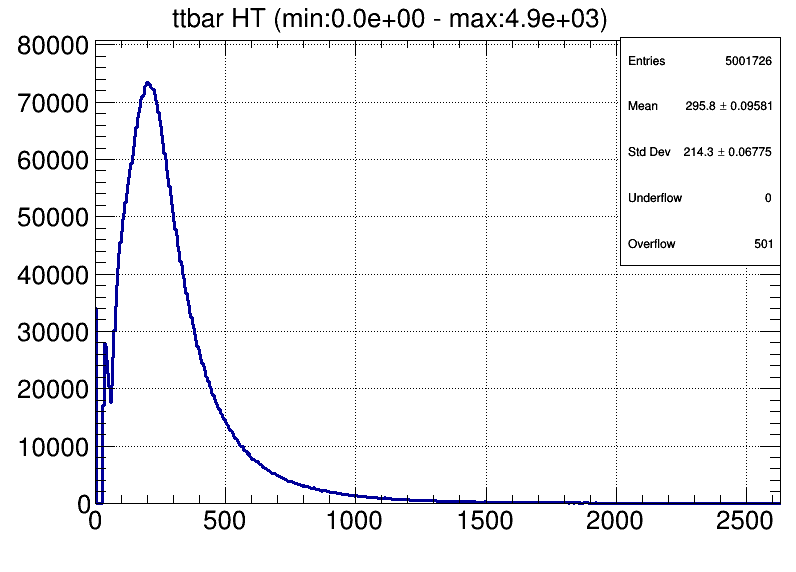

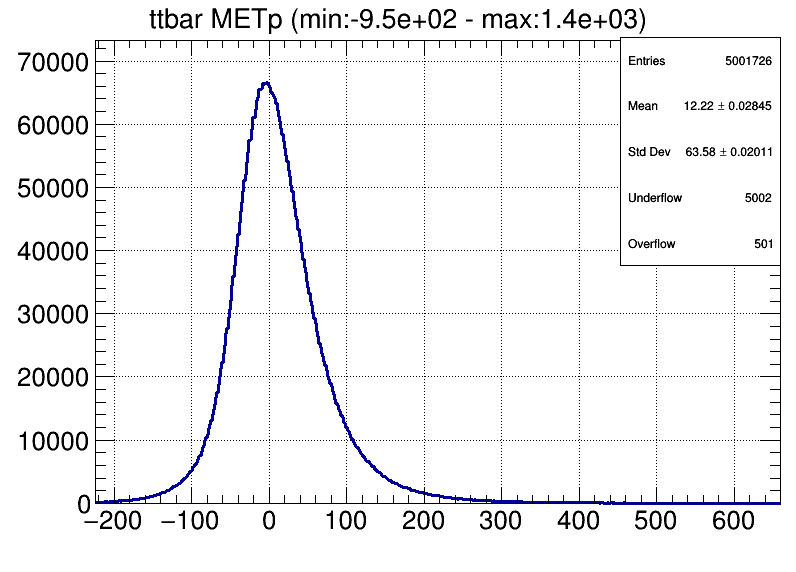

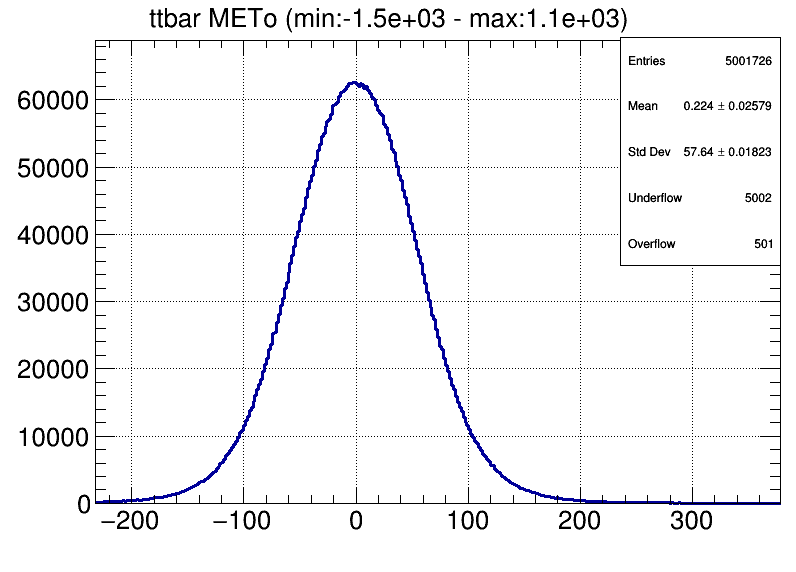

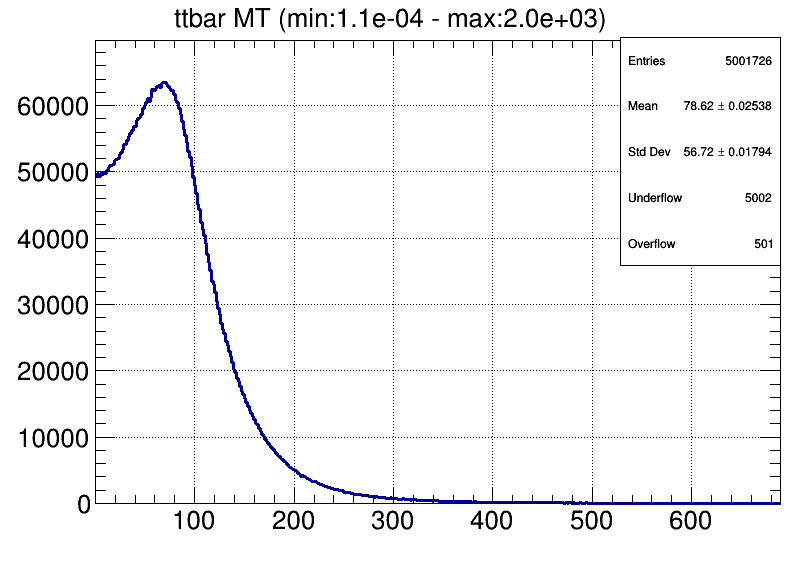

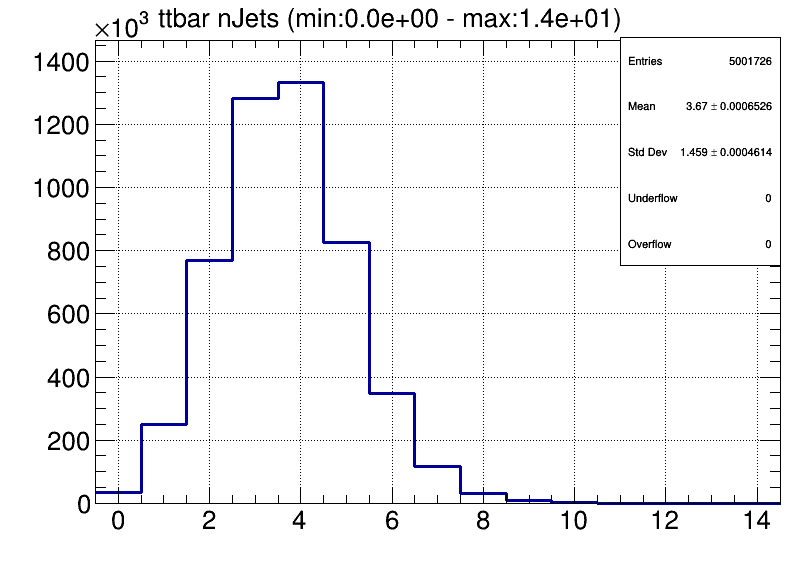

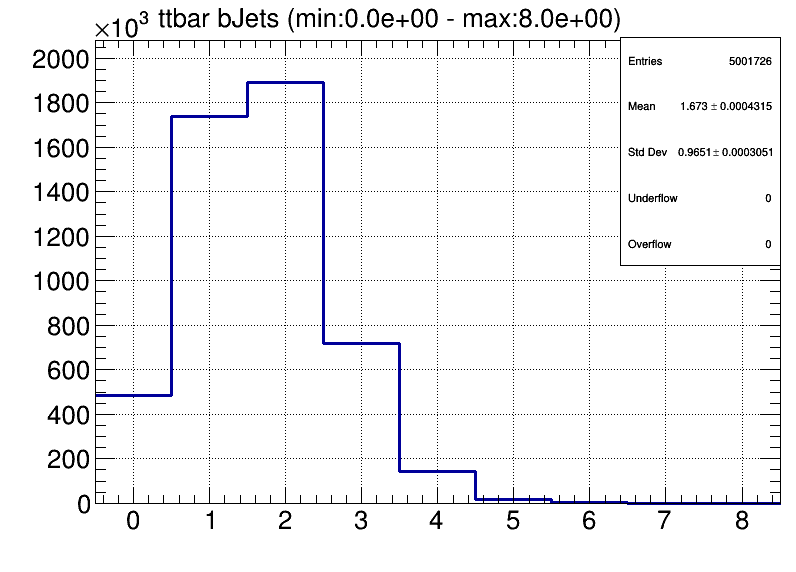

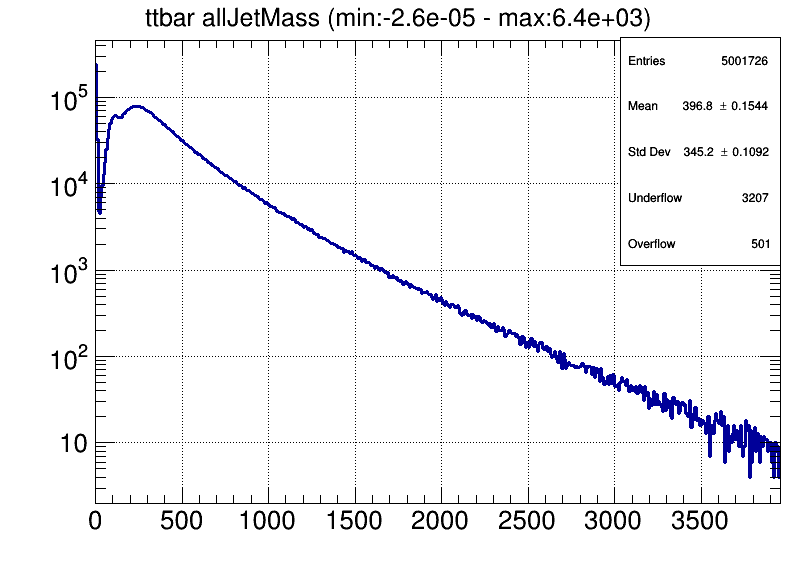

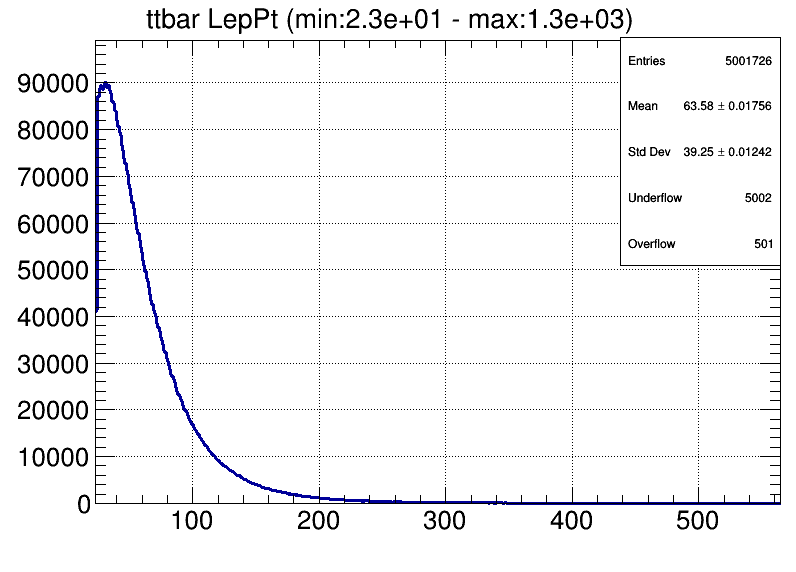

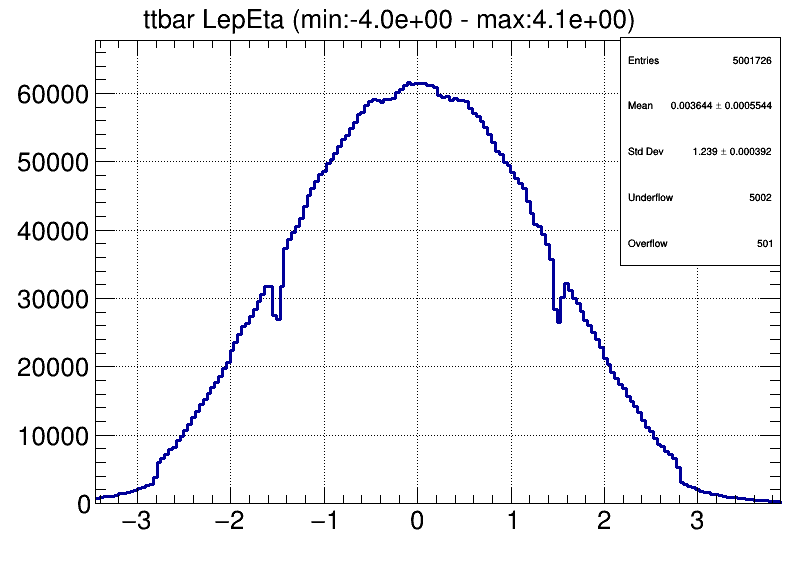

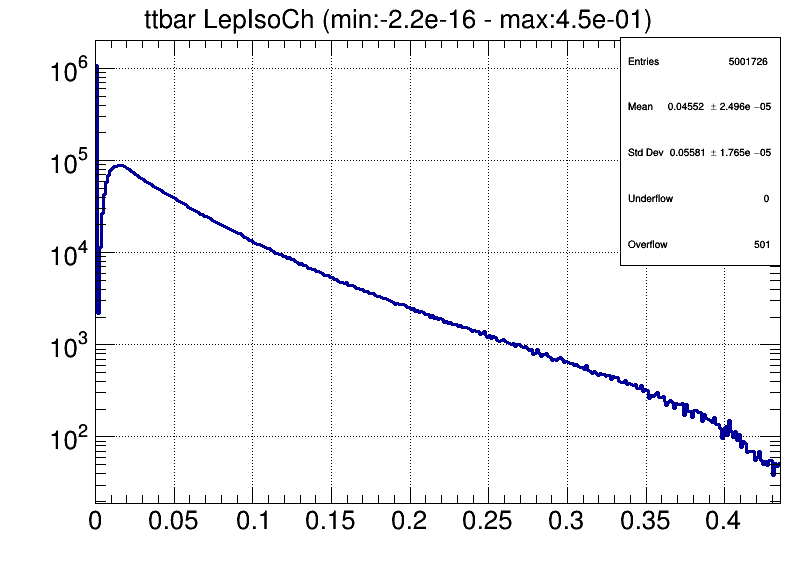

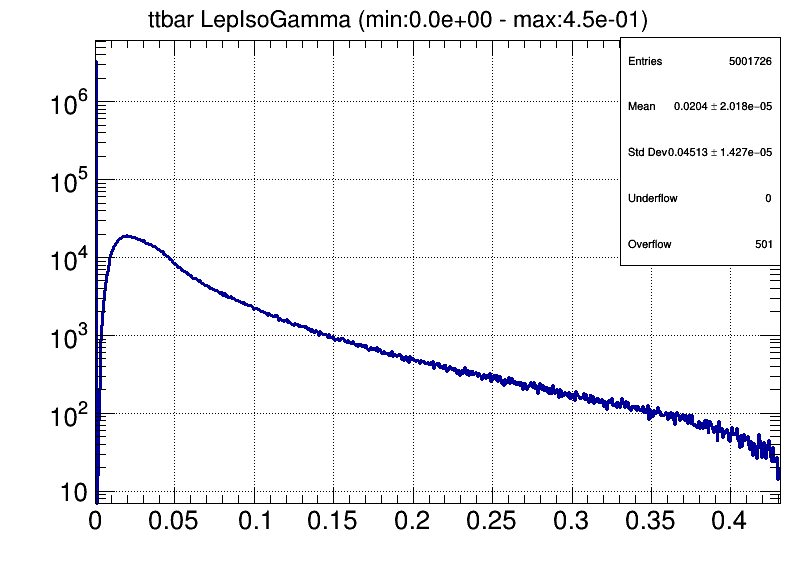

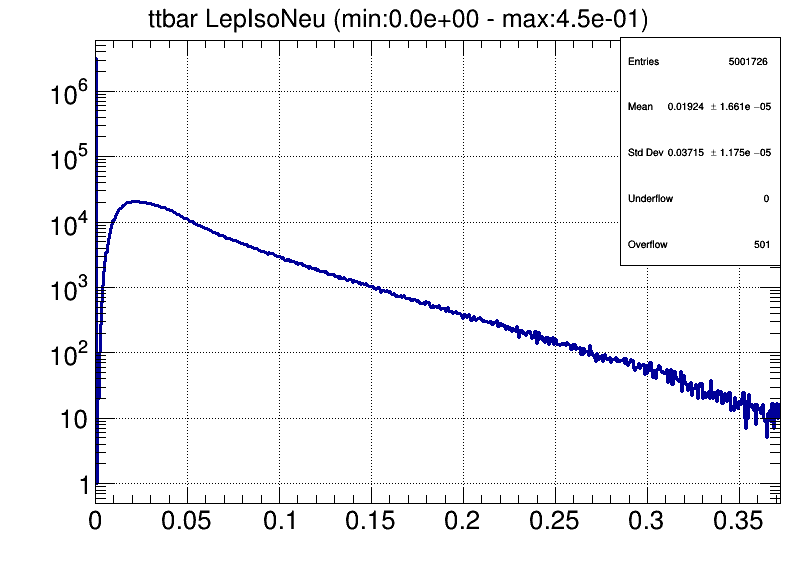

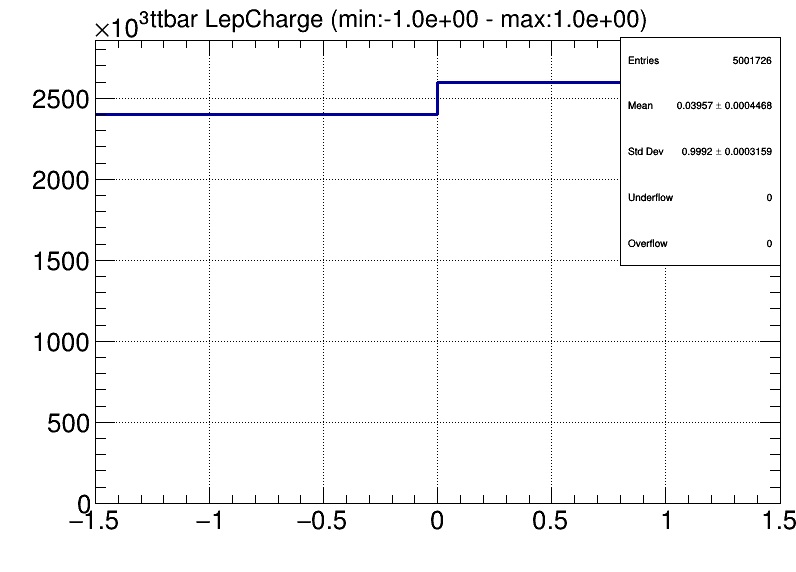

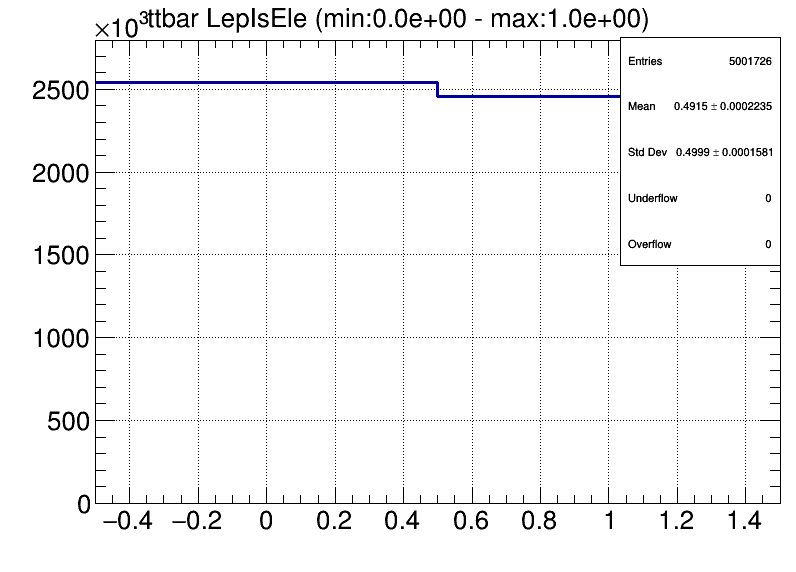

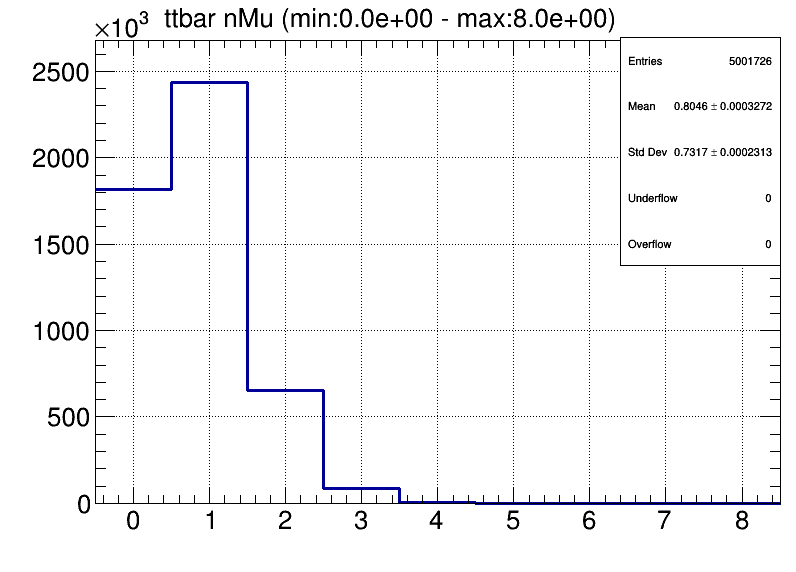

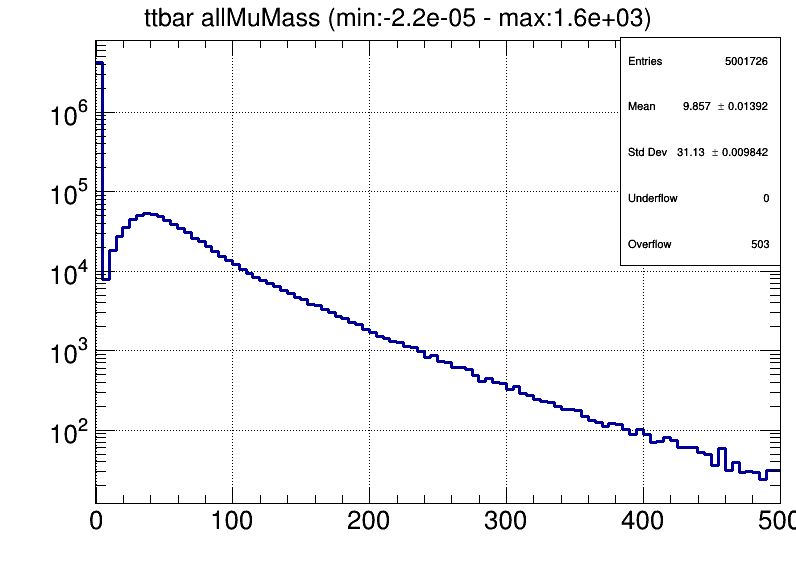

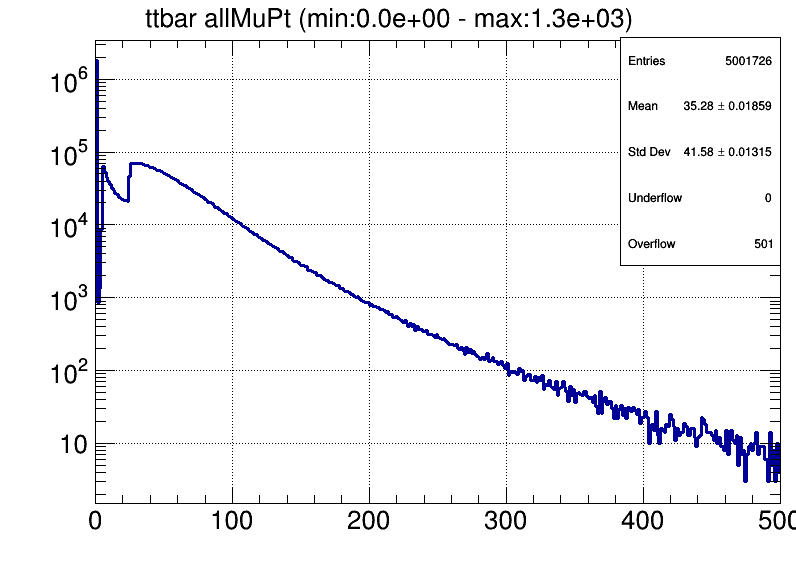

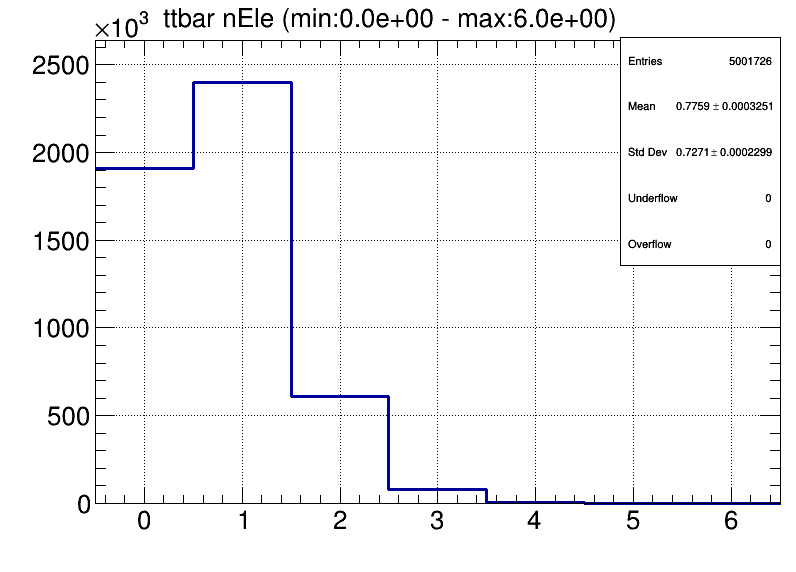

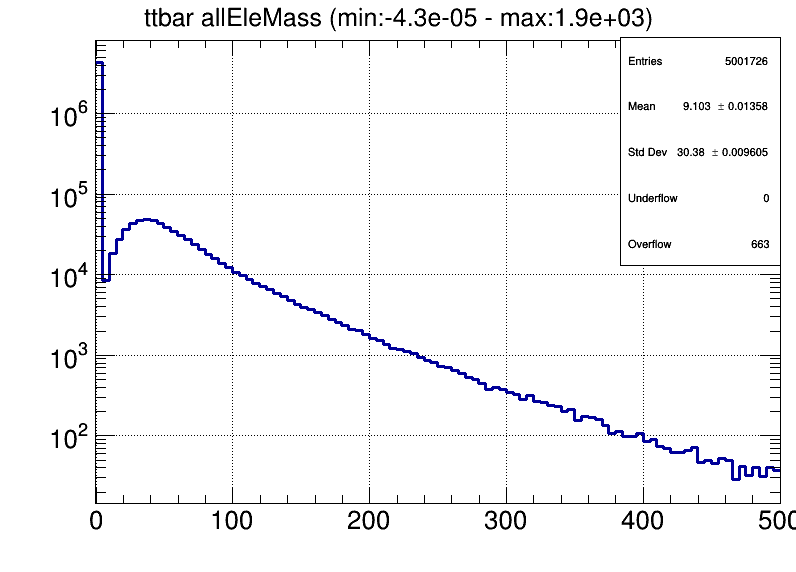

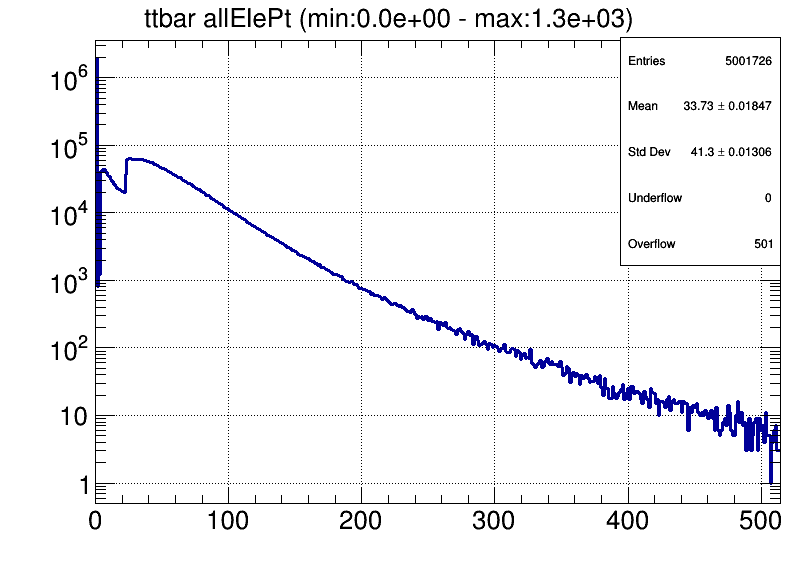

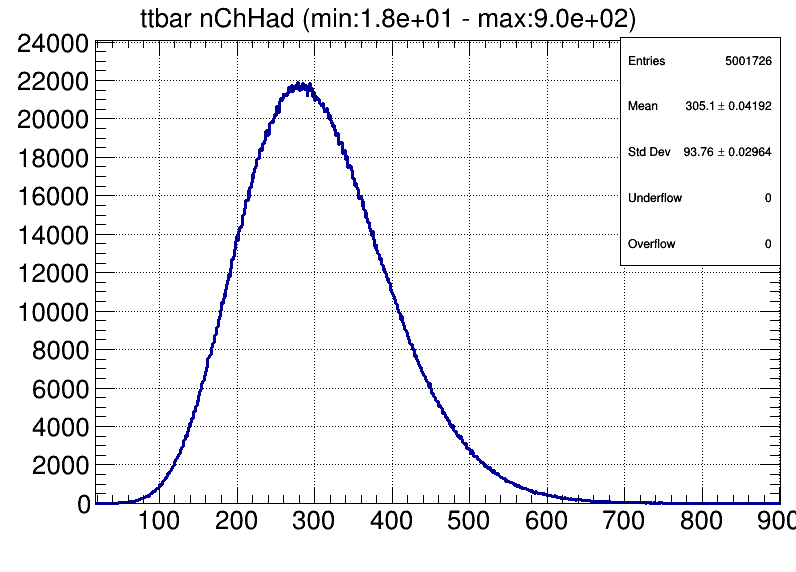

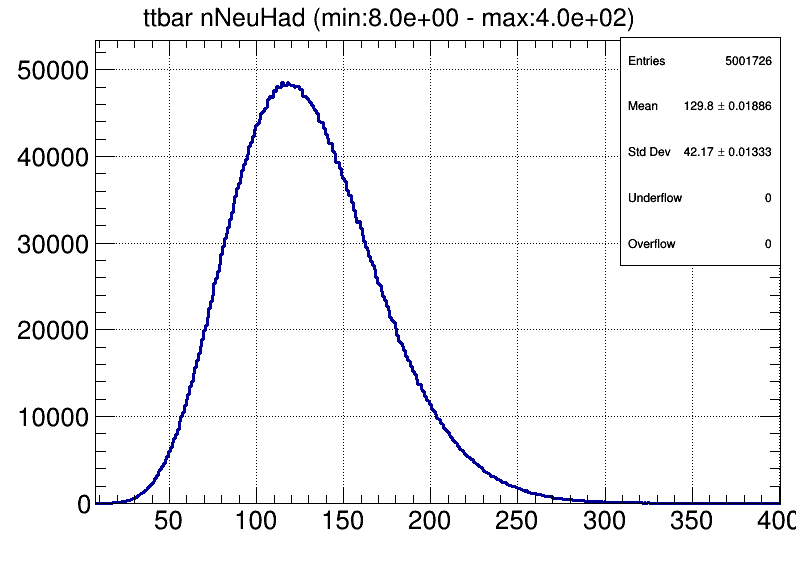

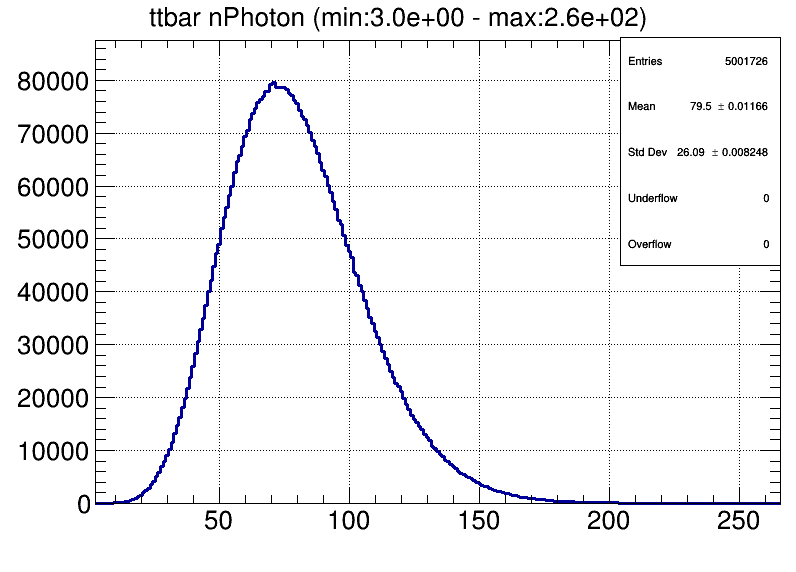

In [12]:
dnd = []

# for DS in dataset_path.keys():
for DS in ['ttbar']:

    arr = np.load(dataset_path[DS])

    for i, nhlf in enumerate(hlf_features):
        a = arr[:, i]
        
#         if i == 18:
#             continue
        
        tag = '_{}_{}'.format(DS, nhlf)
        print tag
        c = rt.TCanvas('c'+tag, 'c'+tag, 800,600)
        if nhlf[0] in ['n', 'b']:
            length = np.max(a) - np.min(a) + 1
            binning = [int(length), np.min(a)-0.5, np.max(a)+0.5]
        elif nhlf in ['LepIsEle', 'LepCharge']:
            binning = [2, np.min(a)-0.5, np.max(a)+0.5]
        elif nhlf in ['allEleMass', 'allMuMass']:
            binning = [100, -0.5, 500.]  
        else:
            bin_w = 4*(np.percentile(a,75) - np.percentile(a,25))/(len(a))**(1./3.)
            if bin_w == 0:
                bin_w = np.std(a)/5
            binning = [None, np.percentile(a, .1), np.percentile(a, 99.99)]
            binning[0] = int((binning[2] - binning[1])/bin_w) + 2

        h = create_TH1D(a, 'h'+tag, '{} {} (min:{:.1e} - max:{:.1e})'.format(DS, nhlf, np.min(a), np.max(a)), binning=binning)
#         h.SetStats(0)
        h.Draw()

        if nhlf.startswith('LepIso') or nhlf.startswith('all'):
            c.SetLogy()
        else:
            h.GetYaxis().SetRangeUser(0, h.GetMaximum()*1.1)

#         c.Update()
        c.Draw()
        c.SaveAs('../fig/DatasetCheck/{}_{}.png'.format(nhlf, DS))
        c.SaveAs('../../www/DatasetCheck/{}_{}.png'.format(nhlf, DS))
        dnd.append([c, h])

In [9]:
def Gaussian(x, mu, sigma):
    xn = (x - mu)/sigma
    return np.exp(-np.square(xn)/2)/(np.sqrt(2*np.pi) * sigma)

def CircGaus(x, mu, sigma):
    aux = Gaussian(x, mu, sigma)
    aux += Gaussian(x - 2*np.pi, mu, sigma)
    aux += Gaussian(x - 4*np.pi, mu, sigma)
    aux += Gaussian(x - 6*np.pi, mu, sigma)
    aux += Gaussian(x + 2*np.pi, mu, sigma)
    aux += Gaussian(x + 4*np.pi, mu, sigma)
    aux += Gaussian(x + 6*np.pi, mu, sigma)
    return aux

1.0010666730179254


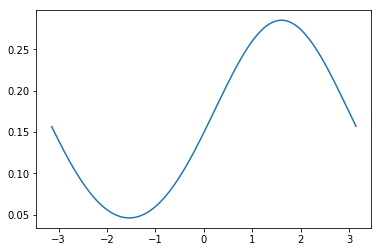

In [10]:
x = np.arange(-np.pi, np.pi, 0.01)
y = CircGaus(x, 1.6, 1.4)
plt.plot(x, y)

print np.sum(y) * 0.01